Groupe 3

Ousseynou SAKHO

Meryem KOSE

Quang Viet NGUYEN

Jessy VY

1 - Importer les librairies et les données

In [413]:
# importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [414]:
# importer le jeu de données de entrainement
training_set = pd.read_csv('train.csv')
training_set

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Road,4,3,179,3,low,F,3,5495,1
1,2,F,Ship,4,4,275,5,medium,M,5,1117,0
2,3,F,Ship,6,2,286,4,medium,M,6,1556,1
3,4,F,Ship,4,1,254,5,low,F,7,1003,0
4,5,F,Road,3,4,245,4,low,M,4,5186,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,7695,C,Flight,5,2,232,2,medium,M,24,2174,1
7695,7696,C,Ship,3,4,169,4,medium,F,32,1245,1
7696,7697,C,Road,4,3,225,3,low,F,62,2587,1
7697,7698,B,Ship,3,2,211,6,low,F,2,4417,0


In [415]:
# importer le jeu de données de test
test_set = pd.read_csv('test.csv')
test_set

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Ship,5,3,250,2,low,F,14,2064
1,2,F,Road,5,4,229,2,medium,F,10,5001
2,3,C,Ship,4,1,270,4,medium,F,64,3312
3,4,F,Flight,3,2,263,3,low,F,57,2113
4,5,F,Ship,6,4,287,4,low,F,5,1972
...,...,...,...,...,...,...,...,...,...,...,...
3295,3296,D,Flight,4,2,136,3,low,F,65,1962
3296,3297,F,Road,3,5,241,3,low,F,5,4861
3297,3298,F,Ship,4,3,235,3,medium,F,4,5748
3298,3299,B,Flight,3,2,152,3,medium,F,7,4244


2 - Analyse des données

In [416]:
# vérifier les valeurs manquantes
training_set.isna().sum()

id                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time        0
dtype: int64

In [417]:
test_set.isna().sum()

id                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [418]:
#les informations sur le jeu de données
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7699 entries, 0 to 7698
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7699 non-null   int64 
 1   Warehouse_block      7699 non-null   object
 2   Mode_of_Shipment     7699 non-null   object
 3   Customer_care_calls  7699 non-null   int64 
 4   Customer_rating      7699 non-null   int64 
 5   Cost_of_the_Product  7699 non-null   int64 
 6   Prior_purchases      7699 non-null   int64 
 7   Product_importance   7699 non-null   object
 8   Gender               7699 non-null   object
 9   Discount_offered     7699 non-null   int64 
 10  Weight_in_gms        7699 non-null   int64 
 11  Reached_on_Time      7699 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 721.9+ KB


In [419]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   3300 non-null   int64 
 1   Warehouse_block      3300 non-null   object
 2   Mode_of_Shipment     3300 non-null   object
 3   Customer_care_calls  3300 non-null   int64 
 4   Customer_rating      3300 non-null   int64 
 5   Cost_of_the_Product  3300 non-null   int64 
 6   Prior_purchases      3300 non-null   int64 
 7   Product_importance   3300 non-null   object
 8   Gender               3300 non-null   object
 9   Discount_offered     3300 non-null   int64 
 10  Weight_in_gms        3300 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 283.7+ KB


3 - Préparation des données

In [420]:
# convertir les catégories en numérique
for col in training_set.columns:
    if training_set[col].dtype == 'object':
        training_set[col] = pd.Categorical(training_set[col]).codes
training_set.head()

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,3,1,4,3,179,3,1,0,3,5495,1
1,2,4,2,4,4,275,5,2,1,5,1117,0
2,3,4,2,6,2,286,4,2,1,6,1556,1
3,4,4,2,4,1,254,5,1,0,7,1003,0
4,5,4,1,3,4,245,4,1,1,4,5186,1


In [421]:
for col in test_set.columns:
    if test_set[col].dtype == 'object':
        test_set[col] = pd.Categorical(test_set[col]).codes
test_set.head()

,id,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,2,5,3,250,2,1,0,14,2064
1,2,4,1,5,4,229,2,2,0,10,5001
2,3,2,2,4,1,270,4,2,0,64,3312
3,4,4,0,3,2,263,3,1,0,57,2113
4,5,4,2,6,4,287,4,1,0,5,1972


4 - Normalisation des données

In [422]:
# importer les librairies pour normaliser les données
from sklearn.preprocessing import StandardScaler

# normaliser les données
sc = StandardScaler()
columns = training_set.drop(['id', 'Reached_on_Time'], axis=1).columns

training_set_norm = sc.fit_transform(training_set[columns])
training_set_norm = pd.DataFrame(training_set_norm, columns=columns)
training_set_norm['Reached_on_Time'] = training_set['Reached_on_Time']
training_set_norm.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,0.442517,-0.675405,-0.042671,0.018017,-0.641953,-0.377890,-0.542600,-1.004035,-0.636709,1.135566,1
1,1.113569,0.642371,-0.042671,0.725745,1.353984,0.937378,1.041578,0.995982,-0.512458,-1.546554,0
2,1.113569,0.642371,1.714156,-0.689710,1.582685,0.279744,1.041578,0.995982,-0.450332,-1.277607,1
3,1.113569,0.642371,-0.042671,-1.397437,0.917372,0.937378,-0.542600,-1.004035,-0.388207,-1.616395,0
4,1.113569,-0.675405,-0.921085,0.725745,0.730253,0.279744,-0.542600,0.995982,-0.574584,0.946262,1


In [423]:

testing_set_norm = sc.fit_transform(test_set[columns])
testing_set_norm = pd.DataFrame(testing_set_norm, columns=columns)
testing_set_norm['id'] = test_set['id']

testing_set_norm.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,id
0,0.458121,0.628956,0.811448,-0.019714,0.814218,-1.015352,-0.560767,-0.963689,0.020446,-0.945531,1
1,1.128541,-0.700676,0.811448,0.687423,0.376419,-1.015352,1.022237,-0.963689,-0.222697,0.842946,2
2,-0.212300,0.628956,-0.059374,-1.433988,1.231170,0.293756,1.022237,-0.963689,3.059738,-0.185565,3
3,1.128541,-2.030307,-0.930197,-0.726851,1.085237,-0.360798,-0.560767,-0.963689,2.634237,-0.915692,4
4,1.128541,0.628956,1.682270,0.687423,1.585579,0.293756,-0.560767,-0.963689,-0.526626,-1.001554,5


5 - Visualisation des données

<AxesSubplot: >

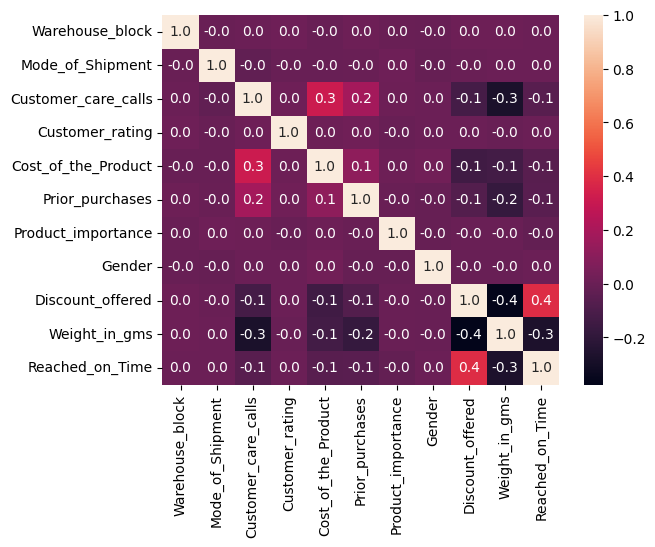

In [424]:
import seaborn as sns
# la matrice de corrélation
sns.heatmap(training_set_norm.corr(), annot=True, fmt='.1f')

6 - Modélisation

In [425]:
# charger les données
# predictors = training_set_norm.drop(['Reached_on_Time'], axis=1).columns
predictors = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
X = training_set_norm[predictors]
y = training_set_norm['Reached_on_Time']
X

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,-0.042671,-0.641953,-0.377890,-0.636709,1.135566
1,-0.042671,1.353984,0.937378,-0.512458,-1.546554
2,1.714156,1.582685,0.279744,-0.450332,-1.277607
3,-0.042671,0.917372,0.937378,-0.388207,-1.616395
4,-0.921085,0.730253,0.279744,-0.574584,0.946262
...,...,...,...,...,...
7694,0.835742,0.459970,-1.035524,0.667929,-0.898998
7695,-0.921085,-0.849863,0.279744,1.164934,-1.468137
7696,-0.042671,0.314433,-0.377890,3.028704,-0.645979
7697,-0.921085,0.023359,1.595012,-0.698835,0.475145


In [611]:
"""# Random Search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression

 C = list(range(1,100))

penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

logreg = LogisticRegression()
random_search = GridSearchCV(logreg, hyperparameters)

best_model = random_search.fit(X, y)
print(best_model.best_estimator_)
print(best_model.best_score_) """

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion = 'gini', max_depth = 5, min_samples_leaf = 28, min_samples_split = 5, splitter = 'best', max_features=5)
model.fit(X, y)

""" # Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( criterion = 'log_loss', max_depth = 5, min_samples_leaf = 5, min_samples_split = 5, n_estimators = 100)
model.fit(X, y) """

""" # Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier( criterion = 'friedman_mse', max_depth = 3, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 100)
model.fit(X, y) """

""" import xgboost as xgb
model = xgb.XGBClassifier(booster = 'gbtree', colsample_bytree = 0.8, gamma = 0.1, learning_rate = 0.1, max_depth = 5, min_child_weight = 1, n_estimators = 100, subsample = 0.8)
model.fit(X, y) """

""" import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type = 'gbdt', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5, min_child_samples = 20, min_child_weight = 0.001, n_estimators = 100, subsample = 0.8)
model.fit(X, y) """

" import lightgbm as lgb\nmodel = lgb.LGBMClassifier(boosting_type = 'gbdt', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5, min_child_samples = 20, min_child_weight = 0.001, n_estimators = 100, subsample = 0.8)\nmodel.fit(X, y) "

In [612]:
from sklearn import model_selection
scores = model_selection.cross_val_score(model, X, y, scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.69805195 0.66688312 0.66753247 0.68116883 0.68940871]
0.680609014117786


In [613]:
# prédictions
y_pred = pd.DataFrame()
y_pred['id'] = test_set['id']
y_pred['Reached_on_Time'] = model.predict(testing_set_norm[predictors])
y_pred.to_csv('result.csv', index=False)
y_pred

,id,Reached_on_Time
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
3295,3296,1
3296,3297,0
3297,3298,0
3298,3299,0
